In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.spatial import distance
import math
from keras.models import save_model,load_model

%matplotlib inline

2023-02-10 10:25:17.261736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/huda/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-10 10:25:17.261774: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [4]:
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_facial_landmarks(gray):
    face_rects = detector(gray, 1)
    if (len(face_rects)==0):
        return -1
    face_landmarks = predictor(image, face_rects[0])
    face_landmarks = np.array([[p.x, p.y] for p in face_landmarks.parts()])
    return face_landmarks

def eye_aspect_ratio(eye_landmarks):
    # Calculate the distances between the horizontal eye landmarks
    A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
    B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
    C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])

    # Calculate the Eye Aspect Ratio (EAR)
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth_landmarks):
    # Calculate the distances between the vertical mouth landmarks
    A = np.linalg.norm(mouth_landmarks[13] - mouth_landmarks[19])
    B = np.linalg.norm(mouth_landmarks[14] - mouth_landmarks[18])
    C = np.linalg.norm(mouth_landmarks[15] - mouth_landmarks[17])
    D = np.linalg.norm(mouth_landmarks[12] - mouth_landmarks[16])

    # Calculate the Mouth Aspect Ratio (MAR)
    mar = (A + B + C) / (2.0 * D)
    return mar

def facial_asymmetry(facial_landmarks):
    # Calculate the center of the face by averaging the landmarks
    face_center = np.mean(facial_landmarks, axis=0)

    # Calculate the distances between each landmark and the face center
    distances = np.linalg.norm(facial_landmarks - face_center, axis=1)

    # Calculate the facial asymmetry as the standard deviation of the distances
    asymmetry = np.std(distances)
    return asymmetry

def get_features(land_marks):
    eye_landmarks = face_landmarks[36:42]
    mouth_landmarks = face_landmarks[48:68]
    ear = eye_aspect_ratio(eye_landmarks)
    mar = mouth_aspect_ratio(mouth_landmarks)
    fa = facial_asymmetry(face_landmarks)
    
    return ear, mar, fa

In [304]:
image = cv2.imread("abc.jpg")
image = get_gray(image)
s = get_facial_landmarks(image)

In [305]:
isinstance(s,np.ndarray)

True

In [271]:
mx = s[48][0]-5
mxw = s[54][0]+5
my = s[51][1]-7
myh = s[57][1]+8

lx = s[18][0]-8
lxw = s[21][0]+5
ly = s[18][1]-8
lyh = s[41][1]+8

rx = s[22][0]-8
rxw = s[25][0]+5
ry = s[22][1]-9
ryh = s[46][1]+5

In [272]:
mouth = image[ my:myh , mx:mxw ]
l_eye = image[ ly:lyh , lx:lxw ]
r_eye = image[ ry:ryh , rx:rxw ]

In [273]:
l_eye = cv2.resize(l_eye, (256,256))
r_eye = cv2.resize(r_eye, (256,256))
mouth = cv2.resize(mouth, (256,256))

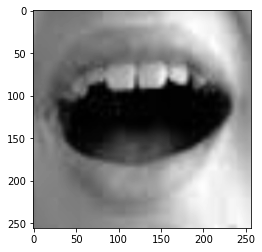

In [277]:
plt.imshow(mouth,cmap="gray")

In [278]:
l_eye = np.expand_dims(l_eye, axis=0)
r_eye = np.expand_dims(r_eye, axis=0)
mouth = np.expand_dims(mouth, axis=0)

In [285]:
l_eye = np.expand_dims(l_eye, axis=0)
r_eye = np.expand_dims(r_eye, axis=0)
mouth = np.expand_dims(mouth, axis=0)

In [291]:
labels_buffer.append(left_eye)
labels_buffer.append(right_eye)
labels_buffer.append(yawn)

In [292]:
labels_buffer

[0.0, 0.0, 1.0]

In [284]:
yawning.predict(mouth)

array([[1.]], dtype=float32)

In [ ]:
yawning = a

In [255]:
np.ceil(eyes.predict(img))

array([[0.]], dtype=float32)

In [256]:
eyes.predict(img)[0][0]

0.0

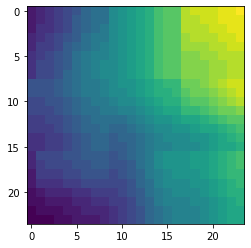

In [178]:
# img = image[ ry:ryh , rx:rxw ]
plt.imshow(img)
# plt.title(img.shape)

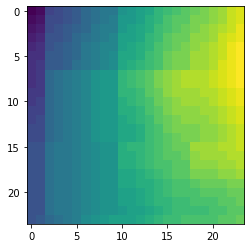

In [176]:
plt.imshow(image[ ly:lyh , lx:lxw ])

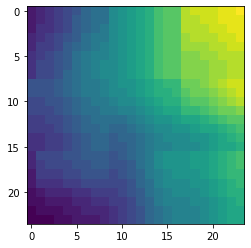

In [177]:
plt.imshow(image[ ry:ryh , rx:rxw ])

In [179]:
# img = cv2.imread("def.jpeg")
mouth = cv2.rectangle(image,(s[48][0]-5, s[51][1]-5),(s[54][0]+5, s[57][1]+8) ,color = (255,1,1))
#left eye
left_eye = cv2.rectangle(image,(s[18][0]-5, s[18][1]-5),(s[21][0]+5, s[41][1]+8) ,color = (255,1,1))
#right eye
right_eye = cv2.rectangle(image,(s[22][0]-5, s[22][1]-5),(s[25][0]+5, s[46][1]+5) ,color = (255,1,1))


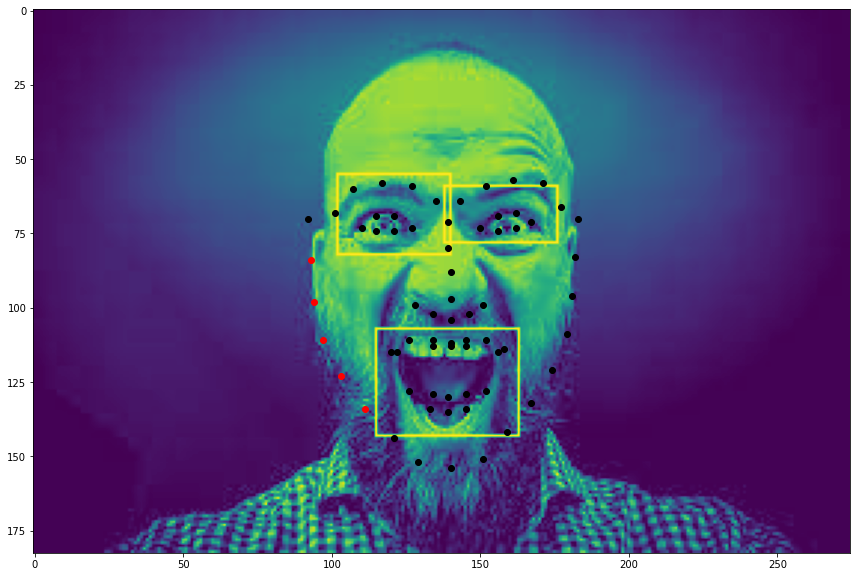

In [180]:
plt.figure(figsize=(18, 10))
plt.imshow(image)
for i in range(68):
    if i>=1 and i<=5:
        color = "red"
    else:
        color = "black"
    plt.scatter(s[i][0],s[i][1] , color=color)

In [202]:
mx = s[48][0]-5
mxw = s[54][0]+5
my = s[51][1]-7
myh = s[57][1]+8

In [203]:
a = image[my:myh,mx:mxw]
# a = cv2.resize(a, (256,256))

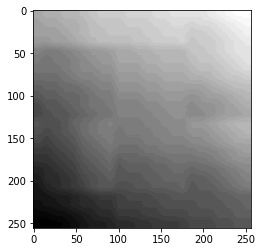

In [191]:
plt.imshow(a,cmap="gray")

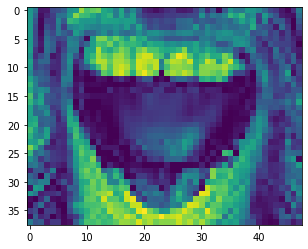

In [204]:
plt.imshow(a)

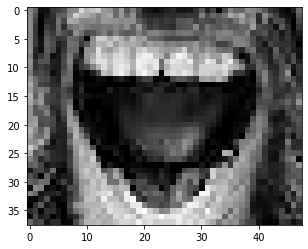

In [199]:
plt.imshow(image[ s[51][1]-7 : s[57][1]+8,s[48][0]-5:s[54][0]+5],cmap="gray")

In [15]:
image[s[48][0]: s[51][1] , s[54][0]: s[57][1]]

array([], shape=(0, 0, 3), dtype=uint8)

ValueError: zero-size array to reduction operation minimum which has no identity

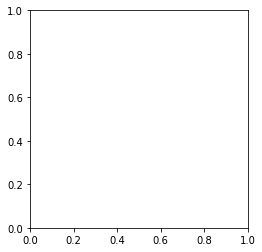

In [11]:
plt.imshow(image[s[48][0]-5: s[51][1]-5 , s[54][0]+5 : s[57][1]+8])

In [14]:
image[s[48][0]-5: s[51][1]+5,s[54][0]+5: s[57][1]+8]

array([], shape=(0, 0, 3), dtype=uint8)

In [36]:
s[48][1]-5: s[57][1]+5 , s[48][0]-5 : s[54][0]+5

mouth = image[s[48][0]-5: s[51][1]-5,s[54][0]+5: s[57][1]+8]
left_eye = image[s[18][0]-5: s[18][1]-5,s[21][0]+5: s[41][1]+8]
#right eye
right_eye = image[s[22][0]-5: s[22][1]-5,s[25][0]+5: s[46][1]+5]

In [37]:
left_eye.shape

(0, 0, 3)

In [ ]:
import cv2

# Read the input image
img = cv2.imread('mpw.jpeg')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    cv2.imshow("face",faces)
    cv2.imwrite('face.jpg', faces)
    
# Display the output
cv2.imwrite('detcted.jpg', img)
plt.imshow('img', img)

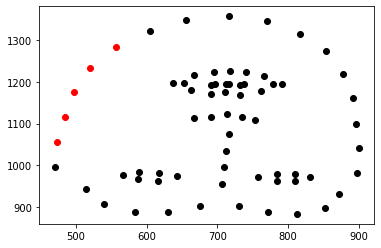

In [7]:
for i in range(68):
    if i>=1 and i<=5:
        color = "red"
    else:
        color = "black"
    plt.scatter(shape[i][0],shape[i][1] , color=color)